In [41]:
import requests
from bs4 import BeautifulSoup

# URL của trang web
url = 'https://cafef.vn/du-lieu/du-lieu-download.chn'

# Gửi yêu cầu HTTP đến trang web và lấy nội dung
response = requests.get(url)

# Phân tích cú pháp HTML của trang web
soup = BeautifulSoup(response.text, 'html.parser')

# Tìm tất cả các thẻ <a> có chứa href và lọc link chứa file .zip

for link in soup.find_all('a', href=True):
    href = link['href']
    # Kiểm tra nếu link chứa ".zip"
    if '.zip' in href:
        full_url = 'https://cafef.vn' + href  # Thêm domain nếu cần
        print(f"Đường dẫn tệp zip: {full_url}")



Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.CCNN.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.CCNN.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Raw.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Raw.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.Index.17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.Index.Upto17012025.zip
Đường dẫn tệp zip: https://cafef.vnhttps://cafef1.mediacdn.vn/data/ami_data/20250117/C

In [15]:
import requests


# URL của tệp tin zip bạn muốn tải
url = "https://cafef1.mediacdn.vn/data/ami_data/20250117/CafeF.SolieuGD.Upto17012025.zip"
# Gửi yêu cầu tải tệp tin
response = requests.get(url)

# Lưu tệp tin zip vào thư mục hiện tại
file_name = "CafeF_SolieuGD_Upto17012025.zip"
with open(file_name, 'wb') as f:
    f.write(response.content)

print(f"Tệp tin {file_name} đã được tải về thành công.")


Tệp tin CafeF_SolieuGD_Upto17012025.zip đã được tải về thành công.


In [42]:
import zipfile
import os

# Đường dẫn tới tệp zip vừa tải
zip_file_path = "CafeF_SolieuGD_Upto17012025.zip"

# Giải nén tệp zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Giải nén vào thư mục hiện tại
    zip_ref.extractall(os.getcwd())

print(f"Đã giải nén tệp tin {zip_file_path}.")


Đã giải nén tệp tin CafeF_SolieuGD_Upto17012025.zip.


       <Ticker>  <DTYYYYMMDD>   <Open>   <High>    <Low>  <Close>  <Volume>
0           AAV      20250117   7.1000   7.3000   7.0000   7.2000    407117
218         AAV      20250116   7.2000   7.3000   7.0000   7.2000    171195
424         AAV      20250115   7.1000   7.3000   7.0000   7.2000    408618
631         AAV      20250114   7.3000   7.3000   6.7000   7.1000   1837221
852         AAV      20250113   7.3000   7.3000   7.0000   7.3000    439050
1075        AAV      20250110   7.4000   7.9000   7.2000   7.2000   1704942
1294        AAV      20250109   7.5000   7.5000   7.3000   7.4000    545830
1510        AAV      20250108   7.2000   7.5000   7.2000   7.5000    948869
1732        AAV      20250107   7.2000   7.2000   7.0000   7.2000    407508
1946        AAV      20250106   7.2000   7.4000   7.1000   7.2000    446414
2168        AAV      20250103   7.4000   7.4000   7.2000   7.2000    762962
2398        AAV      20250102   7.3000   7.5000   7.3000   7.4000    182681
2626        

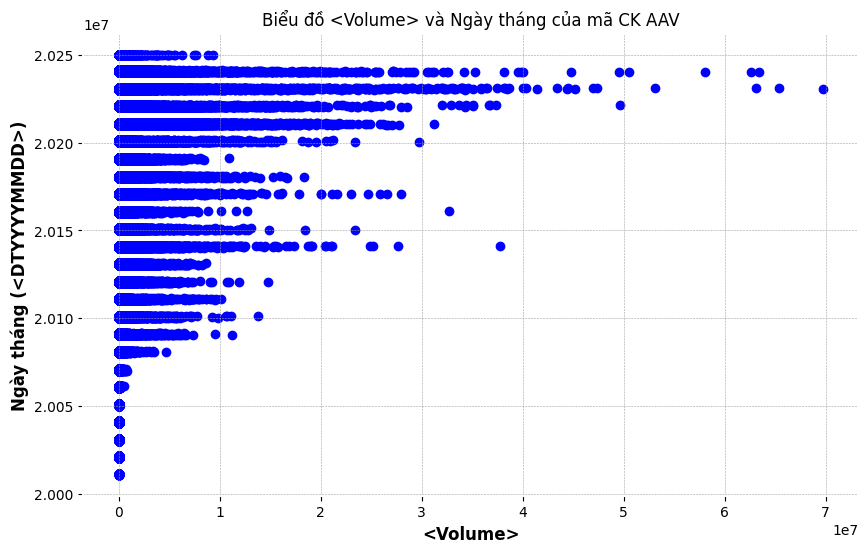

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('CafeF.HNX.Upto17.01.2025.csv')

# Lọc các dòng có mã 'AAV'
df_aav = df[df['<Ticker>'] == 'AAV']

# In kết quả ra màn hình
print(df_aav)
df_aav.to_csv('AAV_data.csv', index=False)


In [48]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('CafeF.HNX.Upto17.01.2025.csv')

# Lọc các dòng có mã 'AAV'
df_aav = df[df['<Ticker>'] == 'AAV']

# Tìm giá mở cửa lớn nhất và nhỏ nhất
max_open = df_aav['<Open>'].max()
min_open = df_aav['<Open>'].min()

# Tìm giá đóng cửa lớn nhất và nhỏ nhất
max_close = df_aav['<Close>'].max()
min_close = df_aav['<Close>'].min()

# In kết quả
print("Số liệu từ 2018 đến 2025 của mã AAV")
print(f"Giá mở cửa lớn nhất của AAV: {max_open}")
print(f"Giá mở cửa nhỏ nhất của AAV: {min_open}")
print(f"Giá đóng cửa lớn nhất của AAV: {max_close}")
print(f"Giá đóng cửa nhỏ nhất của AAV: {min_close}")

Số liệu từ 2018 đến 2025 của mã AAV
Giá mở cửa lớn nhất của AAV: 31.2083
Giá mở cửa nhỏ nhất của AAV: 2.6
Giá đóng cửa lớn nhất của AAV: 31.015
Giá đóng cửa nhỏ nhất của AAV: 2.8


C:\Users\84974\AppData\Local\Temp\ipykernel_10932\2882772978.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aav['Date'] = pd.to_datetime(df_aav['<DTYYYYMMDD>'], format='%Y%m%d')


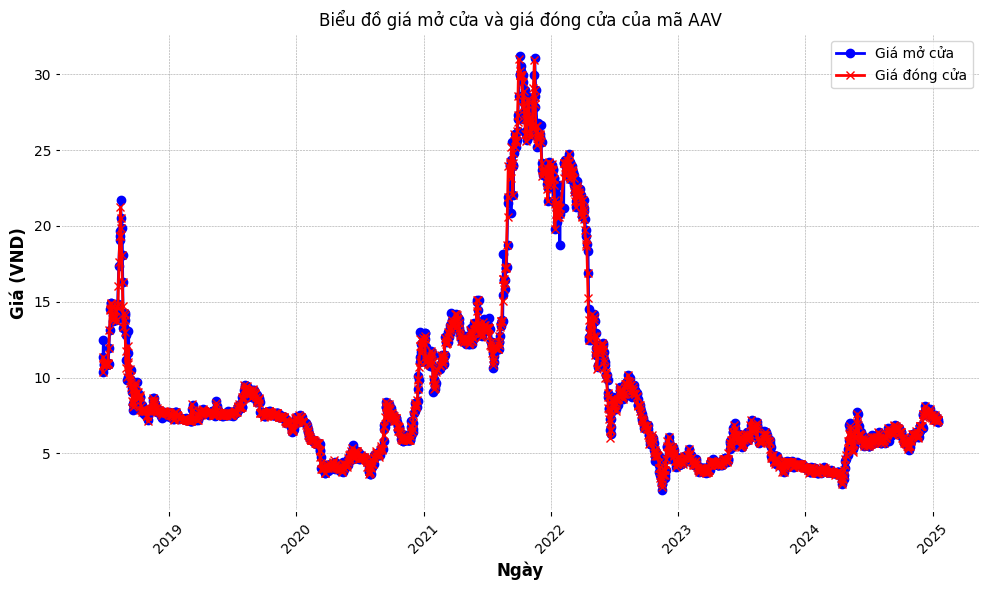

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv('CafeF.HNX.Upto17.01.2025.csv')

# Lọc các dòng có mã 'AAV'
df_aav = df[df['<Ticker>'] == 'AAV']

# Chuyển cột 'DTYYYYMMDD' sang định dạng datetime để dễ dàng xử lý trên biểu đồ
df_aav['Date'] = pd.to_datetime(df_aav['<DTYYYYMMDD>'], format='%Y%m%d')

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ đường cho giá mở cửa
plt.plot(df_aav['Date'], df_aav['<Open>'], label='Giá mở cửa', color='blue', marker='o')

# Vẽ đường cho giá đóng cửa
plt.plot(df_aav['Date'], df_aav['<Close>'], label='Giá đóng cửa', color='red', marker='x')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Biểu đồ giá mở cửa và giá đóng cửa của mã AAV')
plt.xlabel('Ngày')
plt.ylabel('Giá (VND)')

# Hiển thị legend (chú thích)
plt.legend()

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


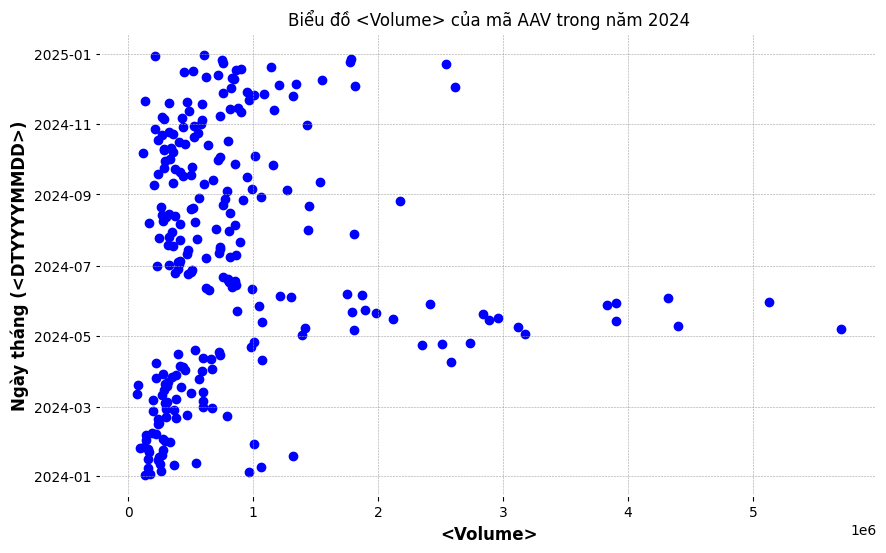

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('CafeF.HNX.Upto17.01.2025.csv')

# Chuyển cột <DTYYYYMMDD> thành dạng datetime
df['<DTYYYYMMDD>'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')

# Lọc các dòng có mã 'AAV' và dữ liệu trong năm 2024
df_aav = df[(df['<Ticker>'] == 'AAV') & (df['<DTYYYYMMDD>'].dt.year == 2024)]

# Vẽ biểu đồ với Volume ở trục x và <DTYYYYMMDD> ở trục y
plt.figure(figsize=(10, 6))  # Tùy chỉnh kích thước biểu đồ

# Sử dụng <Volume> và <DTYYYYMMDD> để vẽ biểu đồ scatter
plt.scatter(df_aav['<Volume>'], df_aav['<DTYYYYMMDD>'], color='blue', marker='o')

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ <Volume> của mã AAV trong năm 2024')  # Tiêu đề
plt.xlabel('<Volume>')  # Nhãn trục x
plt.ylabel('Ngày tháng (<DTYYYYMMDD>)')  # Nhãn trục y

# Hiển thị biểu đồ
plt.show()


C:\Users\84974\AppData\Local\Temp\ipykernel_10932\2313437090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aav.loc[:, 'Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')


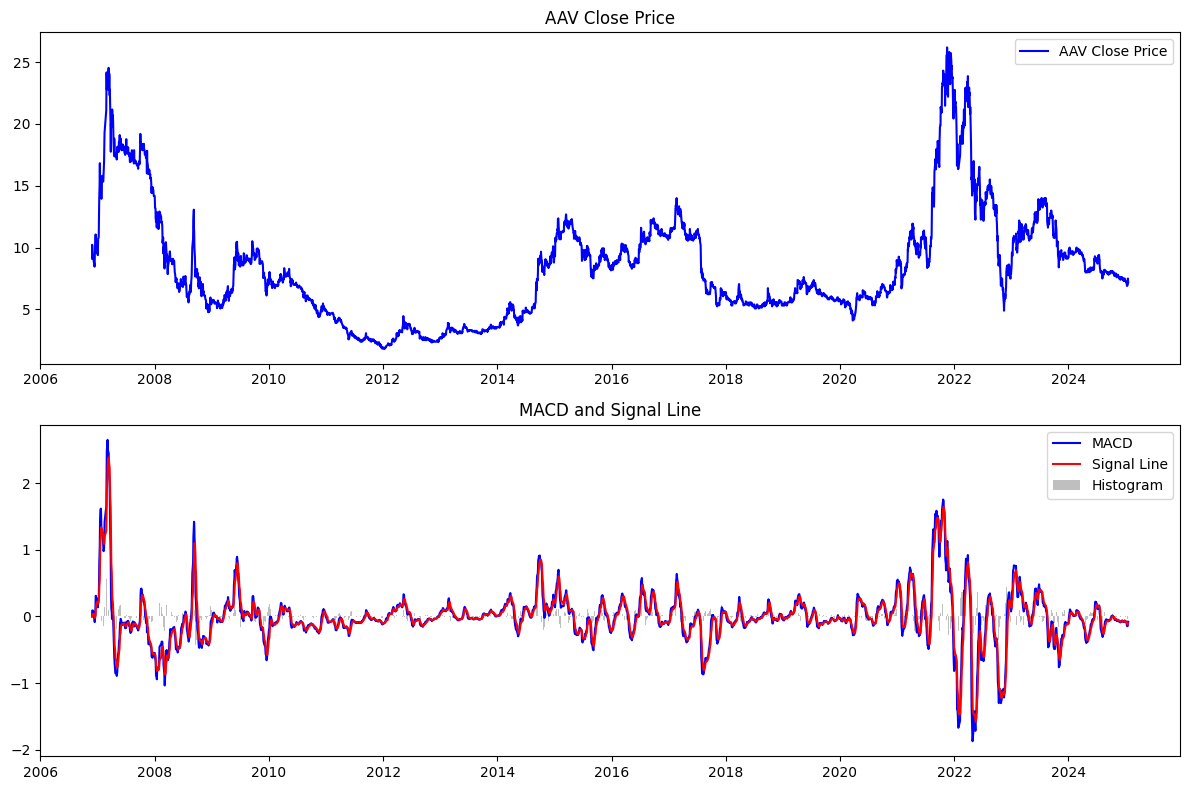

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
file_path = 'CafeF.HNX.Upto17.01.2025.csv'
data = pd.read_csv(file_path)

# Lọc dữ liệu của mã chứng khoán AAV
data_aav = data[data['<Ticker>'] == 'BCC']

# Đảm bảo cột DTYYYYMMDD được chuyển thành định dạng ngày tháng (nếu cần)
data_aav.loc[:, 'Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')

# Sắp xếp dữ liệu theo ngày
data_aav = data_aav.sort_values(by='Date')

# Tính EMA nhanh (12) và EMA chậm (26)
def calculate_ema(prices, period):
    return prices.ewm(span=period, adjust=False).mean()

data_aav['EMA12'] = calculate_ema(data_aav['<Close>'], 12)
data_aav['EMA26'] = calculate_ema(data_aav['<Close>'], 26)

# Tính MACD = EMA12 - EMA26
data_aav['MACD'] = data_aav['EMA12'] - data_aav['EMA26']

# Tính Signal Line (EMA của MACD với chu kỳ 9)
data_aav['Signal_Line'] = calculate_ema(data_aav['MACD'], 9)

# Tính Histogram (MACD - Signal Line)
data_aav['MACD_Histogram'] = data_aav['MACD'] - data_aav['Signal_Line']

# Vẽ biểu đồ MACD
plt.figure(figsize=(12, 8))

# Biểu đồ giá đóng cửa
plt.subplot(2, 1, 1)
plt.plot(data_aav['Date'], data_aav['<Close>'], label='AAV Close Price', color='blue')
plt.title('AAV Close Price')
plt.legend()

# Biểu đồ MACD và Signal Line
plt.subplot(2, 1, 2)
plt.plot(data_aav['Date'], data_aav['MACD'], label='MACD', color='blue')
plt.plot(data_aav['Date'], data_aav['Signal_Line'], label='Signal Line', color='red')
plt.bar(data_aav['Date'], data_aav['MACD_Histogram'], label='Histogram', color='gray', alpha=0.5)
plt.title('MACD and Signal Line')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\84974\AppData\Local\Temp\ipykernel_10932\743354786.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aav['Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')


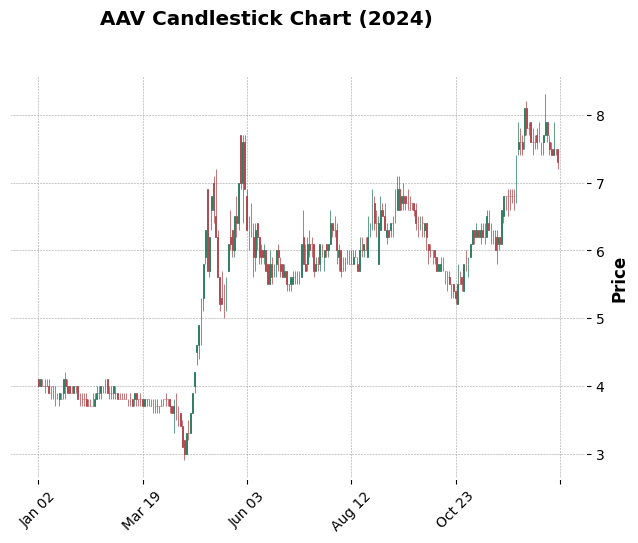

In [24]:
import pandas as pd
import mplfinance as mpf

# Đọc dữ liệu từ file CSV
file_path = 'CafeF.HNX.Upto17.01.2025.csv'
data = pd.read_csv(file_path)

# Lọc dữ liệu của mã chứng khoán AAV
data_aav = data[data['<Ticker>'] == 'AAV']

# Đảm bảo cột DTYYYYMMDD được chuyển thành định dạng ngày tháng (nếu cần)
data_aav['Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')

# Lọc dữ liệu cho năm 2024
data_aav_2024 = data_aav[data_aav['Date'].dt.year == 2024]

# Sắp xếp dữ liệu theo ngày
data_aav_2024 = data_aav_2024.sort_values(by='Date')

# Lấy các cột cần thiết để vẽ biểu đồ nến
data_aav_candlestick_2024 = data_aav_2024[['Date', '<Open>', '<High>', '<Low>', '<Close>']]

# Đổi tên cột cho dễ sử dụng
data_aav_candlestick_2024 = data_aav_candlestick_2024.rename(columns={'Date': 'Date','<Open>': 'Open', '<High>': 'High', '<Low>': 'Low','<Close>': 'Close'})
# Đặt cột 'Date' làm chỉ mục
data_aav_candlestick_2024.set_index('Date', inplace=True)

# Vẽ biểu đồ nến cho dữ liệu năm 2024
mpf.plot(data_aav_candlestick_2024, type='candle', style='charles', title='AAV Candlestick Chart (2024)', ylabel='Price')


C:\Users\84974\AppData\Local\Temp\ipykernel_10932\2828879666.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aav['Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')


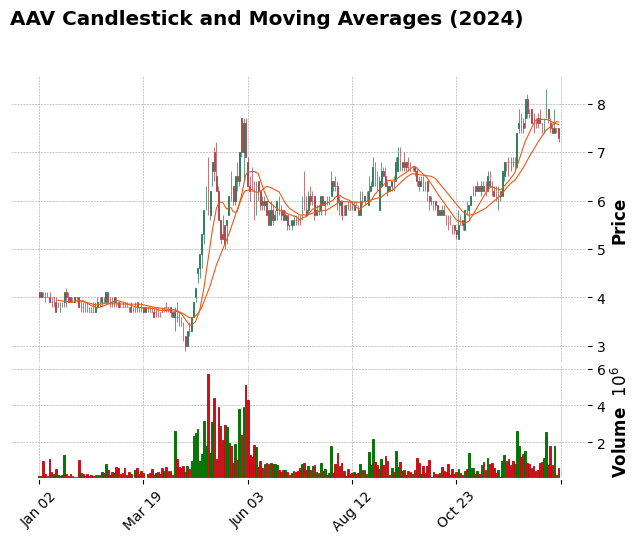

In [34]:
import pandas as pd
import mplfinance as mpf

# Đọc dữ liệu từ file CSV
file_path = 'CafeF.HNX.Upto17.01.2025.csv'
data = pd.read_csv(file_path)

# Lọc dữ liệu của mã chứng khoán AAV
data_aav = data[data['<Ticker>'] == 'AAV']

# Chuyển cột ngày về dạng datetime và đặt làm chỉ mục cho DataFrame
data_aav['Date'] = pd.to_datetime(data_aav['<DTYYYYMMDD>'], format='%Y%m%d')

# Sắp xếp dữ liệu theo ngày
data_aav = data_aav.sort_values(by='Date')

# Đặt cột 'Date' làm chỉ mục
data_aav.set_index('Date', inplace=True)

# Chọn dữ liệu của năm 2024
data_aav_2024 = data_aav[data_aav.index.year == 2024]

# Chuyển đổi các cột tên về đúng định dạng cho mplfinance
data_aav_2024 = data_aav_2024[['<Open>', '<High>', '<Low>', '<Close>', '<Volume>']]
data_aav_2024.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Vẽ biểu đồ nến với Moving Averages (10 và 20 ngày)
mpf.plot(data_aav_2024, 
         type='candle', 
         volume=True, 
         mav=(10, 20),  # Tính Moving Average trực tiếp trong mpf.plot()
         title='AAV Candlestick and Moving Averages (2024)', 
         style='charles')
